### FML -Project

• DOMAIN: Semiconductor manufacturing process

• CONTEXT: A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of 
signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.

• DATA DESCRIPTION: sensor-data.csv : (1567, 592)

The data consists of 1567 datapoints each with 591 features. 

The dataset presented in this case represents a selection of such features where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.

• PROJECT OBJECTIVE: We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the features are required to build the model or not

### Q1 A - Import ‘signal-data.csv’ as DataFrame.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading signal data dataframe
sig_df = pd.read_csv("signal-data.csv")
sig_df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


## Q1 - Print 5 point summary and share at least 2 observations.

In [3]:
sig_df.describe(include='all')

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1567,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
unique,1534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008-10-15 01:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,NaN,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,NaN,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,NaN,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,NaN,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,NaN,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000


In [4]:
sig_df.iloc[:,0:31].describe().T

,count,mean,std,min,25%,50%,75%,max
0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.49000,3056.650000,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.40500,2538.822500,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.06670,2218.055500,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.21440,1591.223500,3715.0417
4,1553.0,4.197013,56.355540,0.6815,1.017700,1.31680,1.525700,1114.5366
5,1553.0,100.000000,0.000000,100.0000,100.000000,100.00000,100.000000,100.0000
6,1553.0,101.112908,6.237214,82.1311,97.920000,101.51220,104.586700,129.2522
7,1558.0,0.121822,0.008961,0.0000,0.121100,0.12240,0.123800,0.1286
8,1565.0,1.462862,0.073897,1.1910,1.411200,1.46160,1.516900,1.6564
9,1565.0,-0.000841,0.015116,-0.0534,-0.010800,-0.00130,0.008400,0.0749


#### Observations
- Many columns having Null values and single unique value
- columns having mean and median seems to be almost equal means they follows Normal distribution
- some of the columns having negative values
- some columns have minimum value is zero 

## Q2 A - Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.

In [5]:
sig_df.drop("Time",axis = 1,inplace = True)    #removing this column may not useful to get patterns

for x in sig_df.columns:
    if (sig_df[x].isnull().sum()/len(sig_df))*100 >= 20.0 :   # removing the columns that have more than 20% null values
        print("**"*30)
        print("The columns {} have 20% + Null values {}".format(x,(sig_df[x].isnull().sum()/len(sig_df)*100)))
        print("---"*30)
        print("dropping these columns")
        sig_df.drop(x,axis=1,inplace=True)
    else:
        print("**"*30)
        print("The columns {} have less than 20% Null values {}".format(x,(sig_df[x].isnull().sum()/len(sig_df)*100)))
        print("Imputation required")
        sig_df[x] = sig_df[x].fillna(sig_df[x].mean())   #imputing with mean

************************************************************
The columns 0 have less than 20% Null values 0.3828972559029994
Imputation required
************************************************************
The columns 1 have less than 20% Null values 0.4467134652201659
Imputation required
************************************************************
The columns 2 have less than 20% Null values 0.8934269304403318
Imputation required
************************************************************
The columns 3 have less than 20% Null values 0.8934269304403318
Imputation required
************************************************************
The columns 4 have less than 20% Null values 0.8934269304403318
Imputation required
************************************************************
The columns 5 have less than 20% Null values 0.8934269304403318
Imputation required
************************************************************
The columns 6 have less than 20% Null values 0.8934269304403318
Imput

In [6]:
sig_df.shape

(1567, 559)

## Q2 B - Identify and drop the features which are having same value for all the rows.

In [7]:
for x in sig_df.columns:
    if len(sig_df[x].unique()) == 1:    #length of the entire column 
        print(f'columnn{x} and unique values are {sig_df[x].unique()}')
        print(f'dropping {x} column')
        sig_df.drop(x,axis =1,inplace=True) #dropping single unique value columns

columnn5 and unique values are [100.]
dropping 5 column
columnn13 and unique values are [0.]
dropping 13 column
columnn42 and unique values are [70.]
dropping 42 column
columnn49 and unique values are [1.]
dropping 49 column
columnn52 and unique values are [0.]
dropping 52 column
columnn69 and unique values are [1.]
dropping 69 column
columnn97 and unique values are [0.]
dropping 97 column
columnn141 and unique values are [0.]
dropping 141 column
columnn149 and unique values are [0.]
dropping 149 column
columnn178 and unique values are [0.]
dropping 178 column
columnn179 and unique values are [0.]
dropping 179 column
columnn186 and unique values are [0.]
dropping 186 column
columnn189 and unique values are [0.]
dropping 189 column
columnn190 and unique values are [0.]
dropping 190 column
columnn191 and unique values are [0.]
dropping 191 column
columnn192 and unique values are [0.]
dropping 192 column
columnn193 and unique values are [0.]
dropping 193 column
columnn194 and unique value

In [8]:
sig_df.shape

(1567, 443)

## Q2 C - Drop other features if required using relevant functional knowledge. Clearly justify the same.

- let us check how much percentage of a column that have unique values

In [9]:
for i in range(sig_df.shape[1]):
    num = len(sig_df.iloc[:, i].unique())
    percentage = float(num) / sig_df.shape[0] * 100
    print(f'{i}   {num}      {percentage} %')

0   1521      97.06445437141033 %
1   1505      96.04339502233567 %
2   508      32.41863433312061 %
3   519      33.12061263560944 %
4   504      32.163369495851946 %
5   511      32.61008296107211 %
6   90      5.74345883854499 %
7   1209      77.15379706445438 %
8   569      36.311423101467774 %
9   393      25.079770261646456 %
10   379      24.186343331206125 %
11   1548      98.78749202297384 %
12   1556      99.29802169751116 %
13   1562      99.68091895341416 %
14   1478      94.32035737077217 %
15   282      17.99617102744097 %
16   1549      98.851308232291 %
17   362      23.101467772814292 %
18   552      35.226547543075945 %
19   1296      82.70580727504786 %
20   1177      75.11167836630504 %
21   1481      94.51180599872367 %
22   1495      95.40523292916401 %
23   705      44.99042756860243 %
24   625      39.8851308232291 %
25   1149      73.32482450542437 %
26   870      55.52010210593491 %
27   189      12.061263560944479 %
28   843      53.797064454371416 %
29   127

In [10]:
sig_df1 = sig_df.copy(deep=True)

- Dropping the columns that hav very few unique values

In [11]:
for i in sig_df.columns:
    num = len(sig_df.loc[:,i].unique())
    percentage = (float(num) / len(sig_df)) * 100
    if percentage < 0.5 :
        print(i, num, percentage)
        if i == 'Pass/Fail':
            print('leave')
        else:
            print("columns drop",i)
            sig_df.drop(i,axis = 1,inplace=True)

74 3 0.1914486279514997
columns drop 74
206 3 0.1914486279514997
columns drop 206
209 3 0.1914486279514997
columns drop 209
342 3 0.1914486279514997
columns drop 342
347 3 0.1914486279514997
columns drop 347
478 3 0.1914486279514997
columns drop 478
Pass/Fail 2 0.12763241863433314
leave


In [12]:
sig_df.shape

(1567, 437)

- The columns that are in original data have only Three types of rows exist 
    - single value
    - Nan value
    - zero value
- After imputation of Nan values with mean , These columns Null values have filled values with mean 
- These columns will not be useful that is they will not give any information about the data so we drop that columns

## Q2 D - Check for multi-collinearity in the data and take necessary action.

In [13]:
# taking the correlation values with absolute
cor_matrix = sig_df.corr().abs()
cor_matrix

,0,1,2,3,4,6,7,8,9,10,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,1.000000,0.143840,0.004756,0.007613,0.011014,0.002270,0.031483,0.052622,0.009045,0.006504,...,0.008601,0.000224,0.023453,0.019907,0.023589,0.018443,0.025880,0.028166,0.004174,0.025141
1,0.143840,1.000000,0.005767,0.007568,0.001636,0.025564,0.012037,0.031258,0.023964,0.009645,...,0.010145,0.043556,0.002904,0.001264,0.002273,0.009403,0.017266,0.010118,0.044797,0.002603
2,0.004756,0.005767,1.000000,0.298935,0.095891,0.136225,0.146213,0.023528,0.016168,0.069893,...,0.028705,0.006023,0.015697,0.018225,0.015752,0.025495,0.029345,0.030818,0.032890,0.000957
3,0.007613,0.007568,0.298935,1.000000,0.058483,0.685835,0.073856,0.102892,0.068215,0.049873,...,0.016438,0.008988,0.025436,0.024736,0.026019,0.034711,0.039132,0.033645,0.080341,0.024623
4,0.011014,0.001636,0.095891,0.058483,1.000000,0.074368,0.347734,0.025946,0.054206,0.006470,...,0.004070,0.045081,0.001300,0.001597,0.001616,0.043929,0.031005,0.026100,0.050910,0.013756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.018443,0.009403,0.025495,0.034711,0.043929,0.041209,0.058113,0.010433,0.033738,0.000327,...,0.002684,0.016726,0.002257,0.001605,0.002743,1.000000,0.167913,0.164238,0.486559,0.004156
587,0.025880,0.017266,0.029345,0.039132,0.031005,0.034027,0.021426,0.022845,0.059301,0.046965,...,0.009405,0.024473,0.002649,0.002498,0.002930,0.167913,1.000000,0.974276,0.390813,0.035391
588,0.028166,0.010118,0.030818,0.033645,0.026100,0.032227,0.020893,0.026250,0.060758,0.046048,...,0.015596,0.020705,0.002260,0.001957,0.002530,0.164238,0.974276,1.000000,0.389211,0.031167
589,0.004174,0.044797,0.032890,0.080341,0.050910,0.043777,0.107804,0.022770,0.004880,0.008393,...,0.024766,0.041486,0.003008,0.003295,0.003800,0.486559,0.390813,0.389211,1.000000,0.002653


In [14]:
#by taking upper traingle part
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
upper_tri

,0,1,2,3,4,6,7,8,9,10,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,NaN,0.14384,0.004756,0.007613,0.011014,0.002270,0.031483,0.052622,0.009045,0.006504,...,0.008601,0.000224,0.023453,0.019907,0.023589,0.018443,0.025880,0.028166,0.004174,0.025141
1,NaN,NaN,0.005767,0.007568,0.001636,0.025564,0.012037,0.031258,0.023964,0.009645,...,0.010145,0.043556,0.002904,0.001264,0.002273,0.009403,0.017266,0.010118,0.044797,0.002603
2,NaN,NaN,NaN,0.298935,0.095891,0.136225,0.146213,0.023528,0.016168,0.069893,...,0.028705,0.006023,0.015697,0.018225,0.015752,0.025495,0.029345,0.030818,0.032890,0.000957
3,NaN,NaN,NaN,NaN,0.058483,0.685835,0.073856,0.102892,0.068215,0.049873,...,0.016438,0.008988,0.025436,0.024736,0.026019,0.034711,0.039132,0.033645,0.080341,0.024623
4,NaN,NaN,NaN,NaN,NaN,0.074368,0.347734,0.025946,0.054206,0.006470,...,0.004070,0.045081,0.001300,0.001597,0.001616,0.043929,0.031005,0.026100,0.050910,0.013756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.167913,0.164238,0.486559,0.004156
587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.974276,0.390813,0.035391
588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.389211,0.031167
589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002653


In [15]:
#checking the columns which have collinearity more than 0.8

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
print(to_drop)

['26', '27', '30', '36', '46', '50', '54', '60', '65', '66', '70', '96', '98', '101', '104', '105', '106', '123', '124', '127', '130', '140', '147', '148', '152', '154', '155', '164', '165', '174', '187', '196', '197', '199', '202', '203', '204', '205', '207', '249', '252', '270', '271', '272', '273', '274', '275', '277', '278', '279', '280', '281', '282', '283', '285', '286', '287', '288', '289', '290', '291', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '316', '317', '318', '319', '320', '321', '323', '324', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '343', '344', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '359', '360', '361', '362', '363', '365', '366', '376', '377', '386', '387', '388', '389', '390', '391', '392', '393', '405', '406', '407', '408', '409', '410', '411', '412', '413', '415', '416', '417', '420', '421', '424', '425', '426

In [16]:
len(to_drop)

216

- All these columns should be dropped since they have high colinearity with other columns

In [17]:
sig_df2 = sig_df.drop(sig_df[to_drop], axis=1)
sig_df2.shape

(1567, 221)

- checking once again statistics report

In [18]:
sig_df2.iloc[:,:31].describe().T

,count,mean,std,min,25%,50%,75%,max
0,1567.0,3014.452896,73.480613,2743.2400,2966.66500,3011.8400,3056.54000,3356.3500
1,1567.0,2495.850231,80.227793,2158.7500,2452.88500,2498.9100,2538.74500,2846.4400
2,1567.0,2200.547318,29.380932,2060.6600,2181.09995,2200.9556,2218.05550,2315.2667
3,1567.0,1396.376627,439.712852,0.0000,1083.88580,1287.3538,1590.16990,3715.0417
4,1567.0,4.197013,56.103066,0.6815,1.01770,1.3171,1.52960,1114.5366
6,1567.0,101.112908,6.209271,82.1311,97.93780,101.4922,104.53000,129.2522
7,1567.0,0.121822,0.008936,0.0000,0.12110,0.1224,0.12380,0.1286
8,1567.0,1.462862,0.073849,1.1910,1.41125,1.4616,1.51685,1.6564
9,1567.0,-0.000841,0.015107,-0.0534,-0.01080,-0.0013,0.00840,0.0749
10,1567.0,0.000146,0.009296,-0.0349,-0.00560,0.0004,0.00590,0.0530


## Q2 E - Make all relevant modifications on the data using both functional/logical reasoning/assumptions.

- The columns that having morethan 20% null values are dropped
- The columns that have only unique values that is very less percentage of entire rows are dropped(<0.5)
- The columns that have high collinearity are dropped

## Q3 A - Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

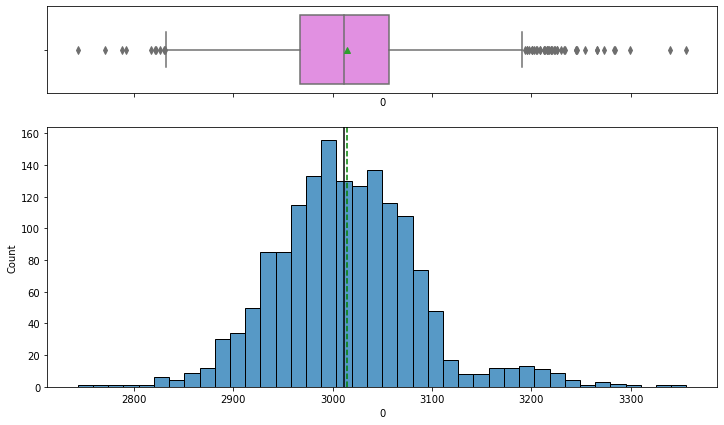

In [21]:
histogram_boxplot(data =sig_df2,feature='0',figsize=(12, 7), kde=False, bins=None)

- It follows normal distribution 
- In Boxplot there are many outliers are present
- most of the values are distriuted from 2900 to 3100

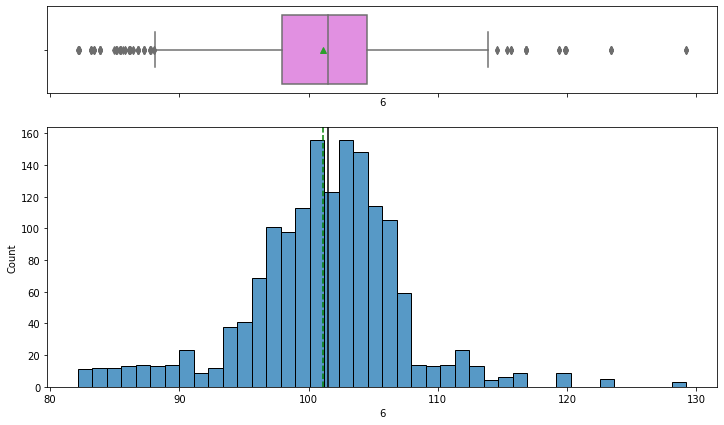

In [22]:
histogram_boxplot(data =sig_df2,feature='6',figsize=(12, 7), kde=False, bins=None)

- It's looking like bimodel distribution but mostly follows normal ditribtion
- slight difference between mean and median
- In Boxplot there are many outliers are present
- most of the values are distriuted from 95 to 110

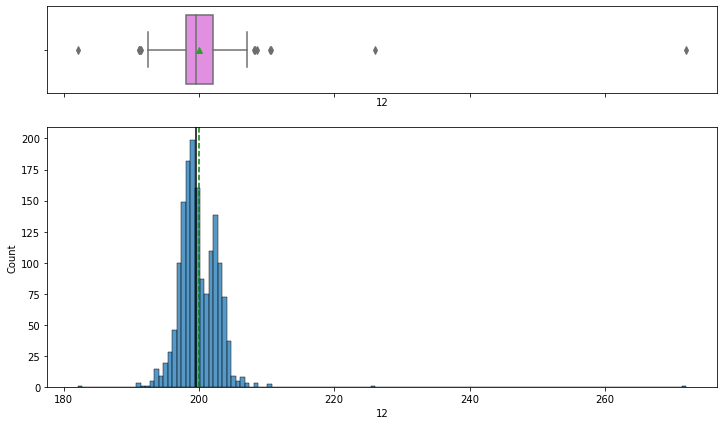

In [23]:
histogram_boxplot(data =sig_df2,feature='12',figsize=(12, 7), kde=False, bins=None)

- The data is right skewed 
- outliers are present and some of them are extremly far away from the actual distribution 
- mean and median almost equal

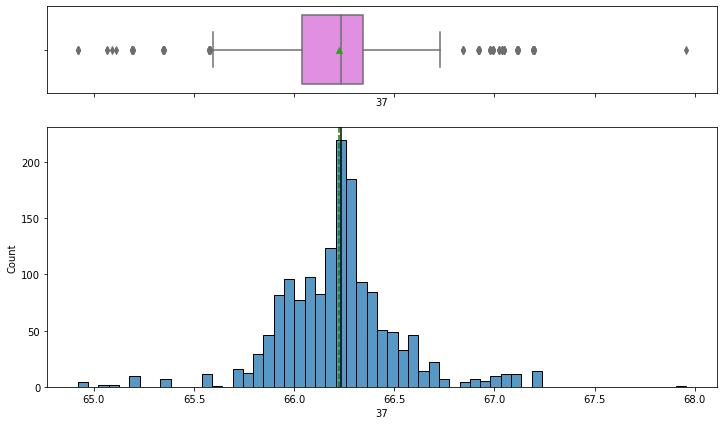

In [24]:
histogram_boxplot(data =sig_df2,feature='37',figsize=(12, 7), kde=False, bins=None)

- It mostly follows Normal ditribtion
- Mean and median are almost equal
- In Boxplot there are many outliers are present
- most of the values are distriuted from 66.0 to 66.5

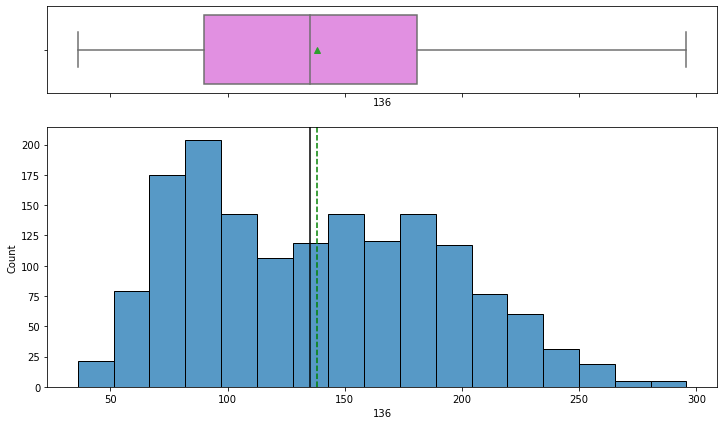

In [25]:
histogram_boxplot(data =sig_df2,feature='136',figsize=(12, 7), kde=False, bins=None)

- Mean and median are slightly different
- In Boxplot there are no outliers are present

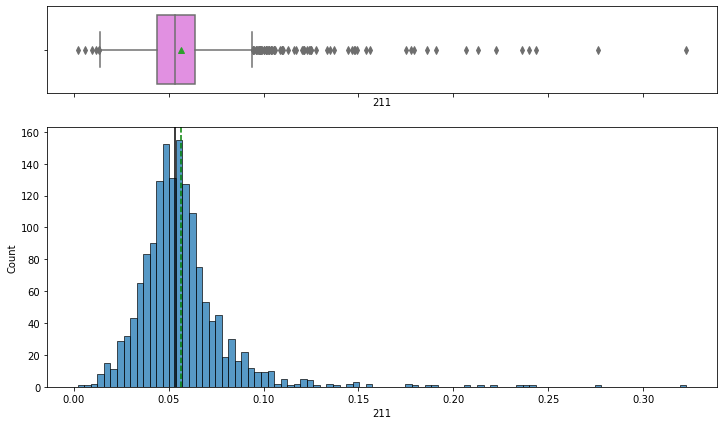

In [26]:
histogram_boxplot(data =sig_df2,feature='211',figsize=(12, 7), kde=False, bins=None)

- The data is right skewed 
- there are many outliers are present and some of them are extremly far away from the actual distribution 
- mean and median have very less difference

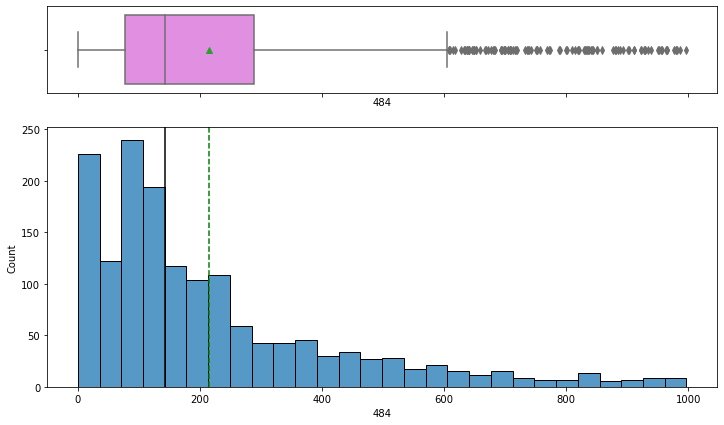

In [27]:
histogram_boxplot(data =sig_df2,feature='484',figsize=(12, 7), kde=False, bins=None)

- The data is right skewed 
- The difference between mean and median is high
- Most of the values are distributes from 0 to 300

## Q3 B - Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.

In [28]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

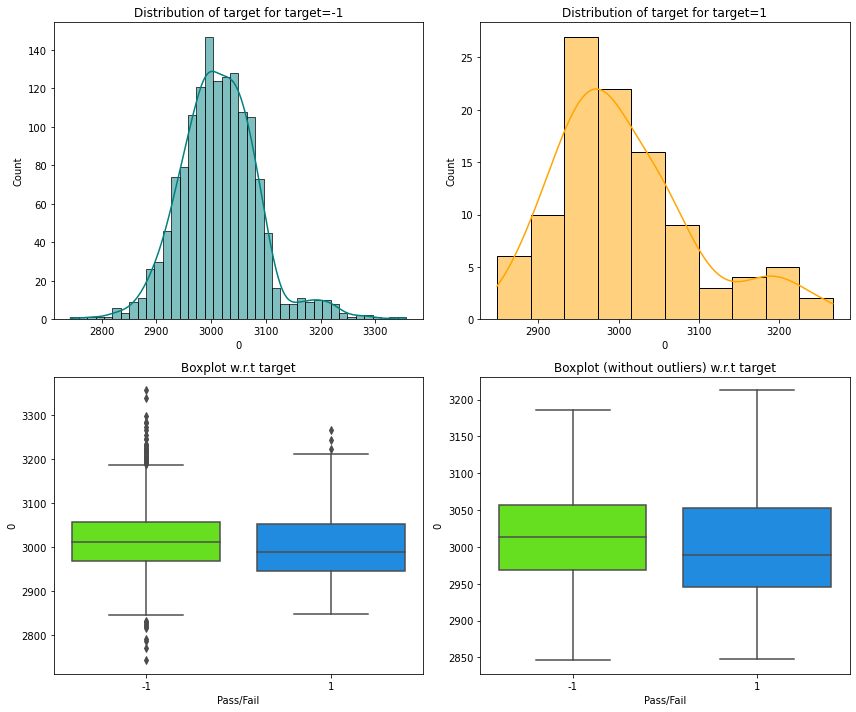

In [29]:
distribution_plot_wrt_target(sig_df2,predictor='0',target='Pass/Fail')

- The distributions of independent variable with the target classes look like same
- The classes almost follows Normal distribution and A liitle hump indicates at the end indication of bimodel distribution slightly
- In the box plots There is no clear seperation target variable classes
- Majority of the distribution of the 2900 to 3000

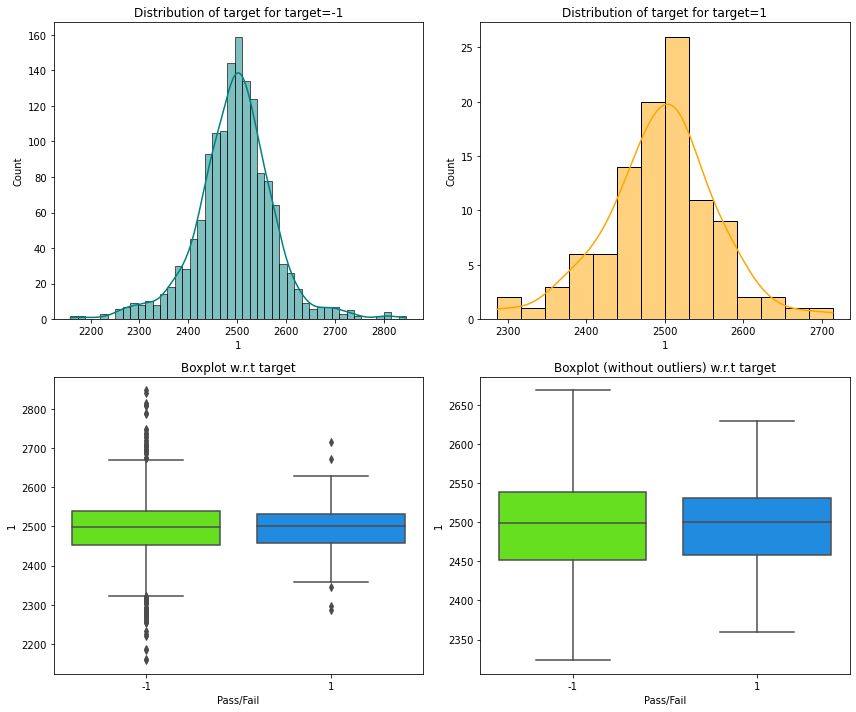

In [30]:
distribution_plot_wrt_target(sig_df2,predictor='1',target='Pass/Fail')

- The distributions of independent variable with the target classes look like same and follows Normal distribution
- In the box plots There is no clear seperation target variable classes
- Majority of the distribution of the 2400 to 2600 in both the classes

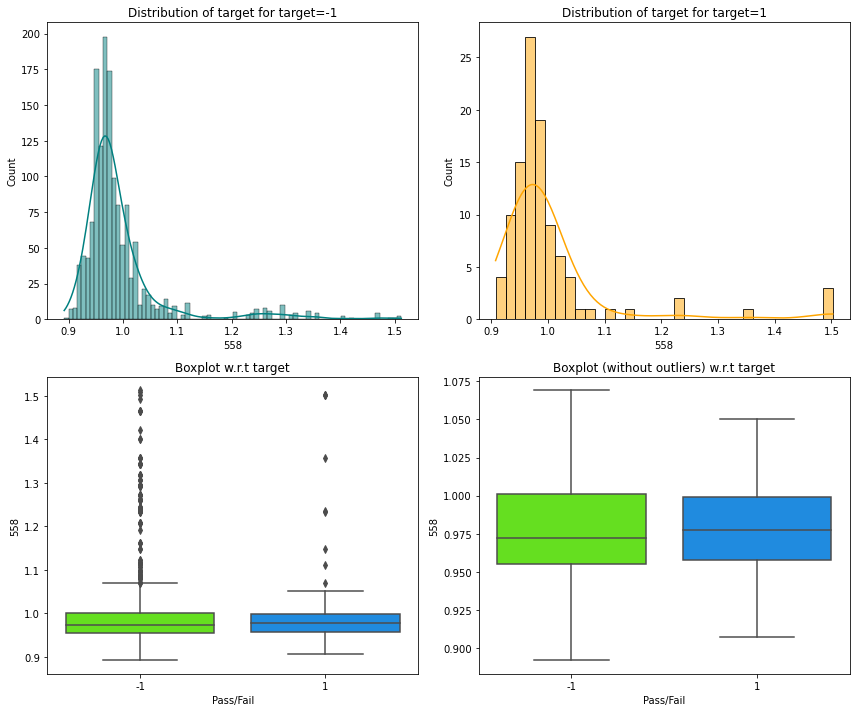

In [31]:
distribution_plot_wrt_target(sig_df2,predictor='558',target='Pass/Fail')

- The distributions of independent variable with the target classes look like same
- Both the classes with independent variable Right skewed distribution
- In the box plots There is no clear seperation target variable classes
- Majority of the distribution from  0.96 to 1.00

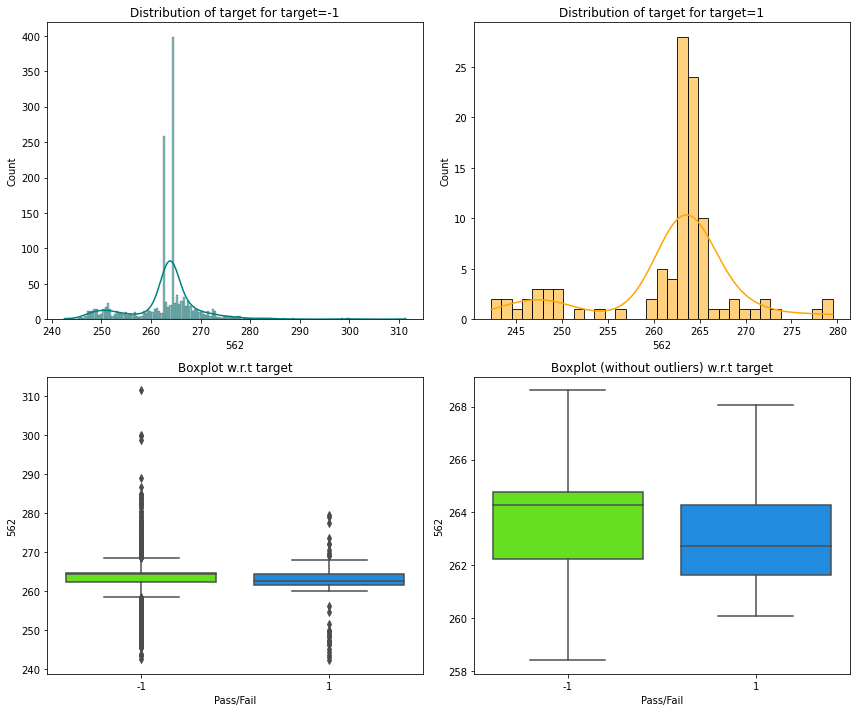

In [32]:
distribution_plot_wrt_target(sig_df2,predictor='562',target='Pass/Fail')

- The distributions of independent variable with the target classes look like same
- In the box plots There is no clear seperation target variable classes but little variation in distributions are obseved
- Even after removal of outliers both class median are different
- Both of the classes follows bimodal distribution
- Majority of the distribution of the classes from 266 to 268

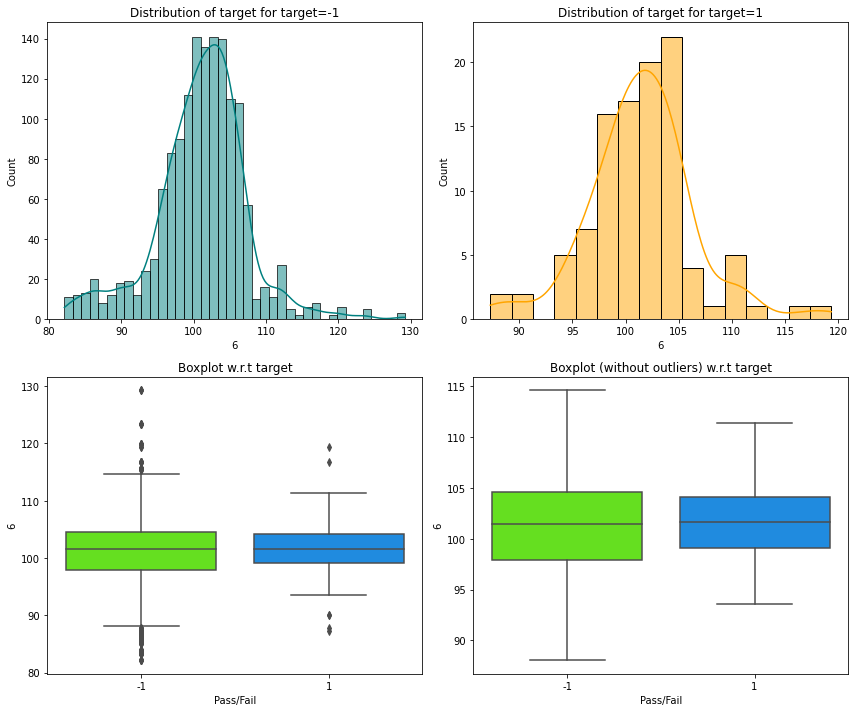

In [33]:
distribution_plot_wrt_target(sig_df2,predictor='6',target='Pass/Fail')

- The distributions of independent variable with the target classes look like same and follows Normal ditribution almost
- In the box plots There is no clear seperation target variable classes
- In both classes median are almost equal
- Majority of the distribution of the classes from 95 to 105

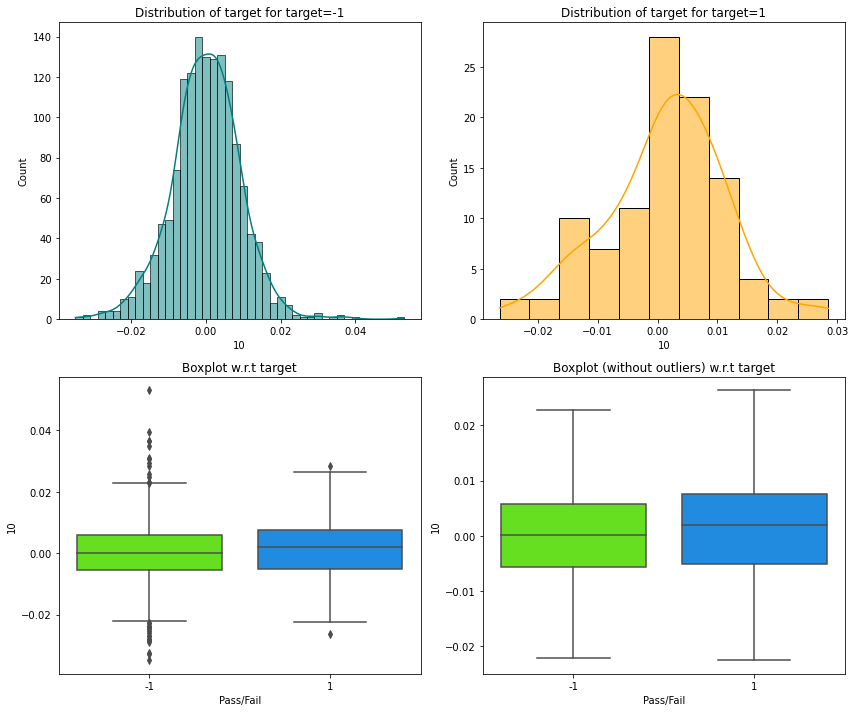

In [34]:
distribution_plot_wrt_target(sig_df2,predictor='10',target='Pass/Fail')

- The distributions of independent variable with the target classes look like same and follows Normal distribution
- In the box plots There is no clear seperation target variable classes
- Majority of the distribution from -0.01 to 0.02

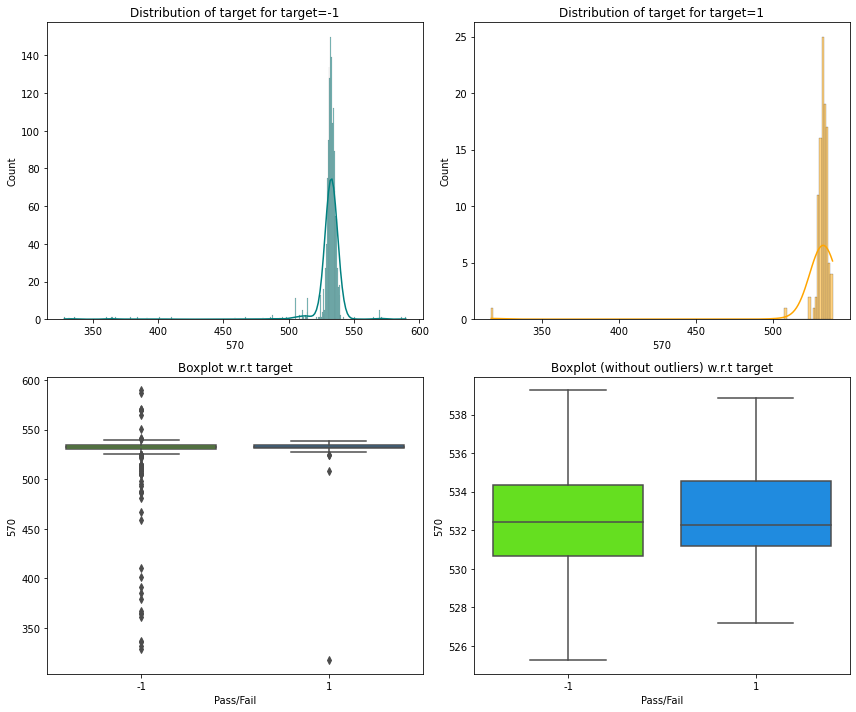

In [35]:
distribution_plot_wrt_target(sig_df2,predictor='570',target='Pass/Fail')

- The distributions of independent variable with the target classes look like same and left skewed
- Many outliers are obseved in class "-1"
- In the box plots There is no clear seperation target variable classes
- Majority of the distribution of the 500 to 550
- After removal of outliers the distribution of the classes 530 to 534

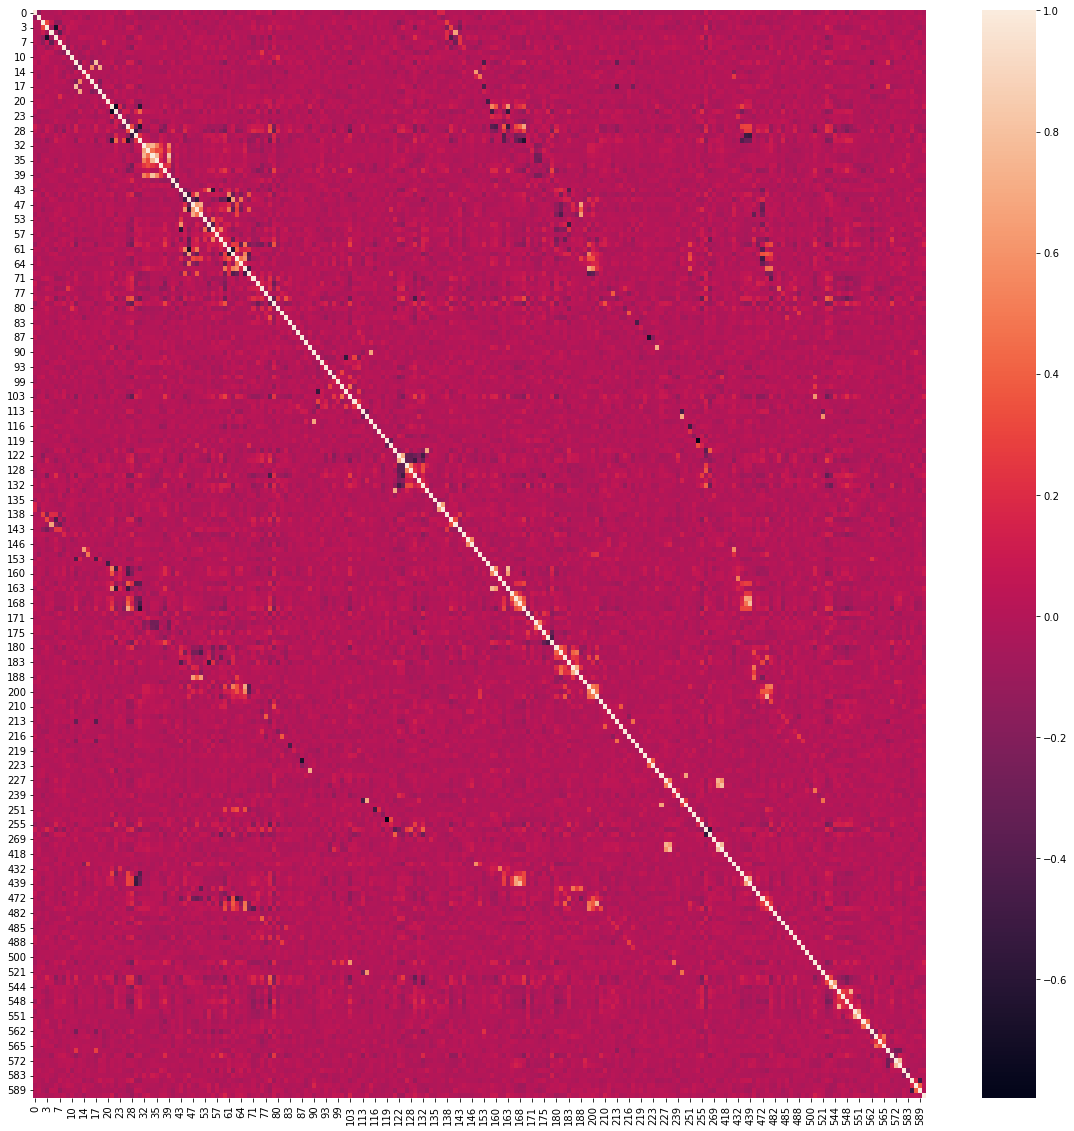

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(sig_df2.corr());

- lighter the color stronger the correlation
- very few values that having correlation with other columns may be (0.6 to 0.79)
- since most of the columns are removed we are seeing here very less correaltion columns 

## Q4 A - Segregate predictors vs target attributes.

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

lgt = LogisticRegression()
dtree = DecisionTreeClassifier()
svm = SVC()
knn = KNeighborsClassifier()
param_models = [svm,knn]

In [38]:
scaler = StandardScaler()

In [39]:
X = sig_df2.drop('Pass/Fail',axis=1)
Y = sig_df2['Pass/Fail']

In [40]:
Y.replace(-1,0,inplace=True)

## Q4 B - Check for target balancing and fix it if found imbalanced.

In [41]:
Y.value_counts()

0    1463
1     104
Name: Pass/Fail, dtype: int64

- The Target variable is imbalanced

In [42]:
seed = 42

In [43]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=seed)

In [44]:
X_sm,Y_sm = smt.fit_resample(X,Y)
X_sm.shape,Y_sm.shape

((2926, 220), (2926,))

## Q4 C - Perform train-test split and standardise the data or vice versa if required.

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_temp, X_test, y_temp, y_test = train_test_split(X_sm, Y_sm, test_size=0.2, random_state=seed, stratify=Y_sm)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=seed, stratify=y_temp)
print(X_train.shape, X_val.shape, X_test.shape)

(1755, 220) (585, 220) (586, 220)


In [47]:
x_train_scale = scaler.fit_transform(X_train)
x_val_scale = scaler.fit_transform(X_val)

In [48]:
x_train_scale

array([[-0.88115119, -0.60353924, -0.17460466, ..., -0.90661725,
        -0.09882005,  0.52670675],
       [-0.17952653,  0.65319932,  0.54238371, ..., -0.28821839,
        -0.76610102, -0.50134192],
       [ 1.13486593, -0.27307249,  0.04900712, ...,  1.47257673,
         1.96943523, -0.13720449],
       ...,
       [-1.09367194, -0.1991595 , -0.33925986, ...,  1.1156789 ,
         1.28206066, -0.11761606],
       [-0.61687281, -0.42809571, -0.44803617, ...,  0.40833556,
         1.0930128 , -0.01432814],
       [-0.48866509,  0.2924649 ,  0.81404493, ...,  0.37435183,
        -0.81552924, -0.74035362]])

## Q4 D - Check if the train and test data have similar statistical characteristics when compared with original data.

In [49]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1755.0,3008.140627,71.768212,2743.2400,2959.775770,2998.901240,3048.745000,3356.3500
1,1755.0,2493.708085,71.180667,2162.8700,2456.588855,2498.761226,2530.741334,2846.4400
2,1755.0,2200.136325,26.879364,2060.6600,2182.588850,2198.618202,2216.165364,2315.2667
3,1755.0,1375.890861,364.160602,711.0258,1108.797350,1295.288300,1580.828775,3619.7397
4,1755.0,2.600459,37.489147,0.6815,1.081482,1.325777,1.502075,1112.1600
...,...,...,...,...,...,...,...,...
582,1755.0,0.500254,0.003345,0.4778,0.498100,0.500365,0.502400,0.5098
583,1755.0,0.015654,0.016332,0.0065,0.011821,0.013933,0.016792,0.4766
586,1755.0,0.021963,0.011323,-0.0169,0.014760,0.021120,0.027800,0.1028
587,1755.0,0.017000,0.008095,0.0032,0.011497,0.015767,0.020799,0.0799


In [50]:
X_val.describe().T

,count,mean,std,min,25%,50%,75%,max
0,585.0,3004.880484,63.708031,2829.8400,2963.606516,2994.640000,3045.050000,3245.000000
1,585.0,2497.965230,67.291697,2281.3500,2461.080000,2497.853438,2538.194868,2786.970000
2,585.0,2199.388118,27.326824,2060.6600,2181.384566,2199.033300,2213.911100,2315.266700
3,585.0,1348.346211,380.251411,711.0258,1082.466974,1268.449683,1551.694700,3715.041700
4,585.0,1.324857,0.472100,0.7217,1.051800,1.290997,1.476747,4.197013
...,...,...,...,...,...,...,...,...
582,585.0,0.500140,0.003187,0.4922,0.498200,0.500200,0.501994,0.509700
583,585.0,0.014993,0.005153,0.0071,0.011600,0.014100,0.016868,0.043800
586,585.0,0.021800,0.010749,-0.0031,0.015220,0.021384,0.027500,0.102800
587,585.0,0.016953,0.007397,0.0048,0.011500,0.015810,0.021000,0.055422


In [51]:
X_test.describe()

,0,1,2,3,4,6,7,8,9,10,...,565,570,571,572,573,582,583,586,587,589
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,...,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,3008.114466,2497.735024,2200.997462,1402.330699,5.117004,100.941974,0.121755,1.464508,-0.000999,0.000145,...,0.150634,530.672886,2.094585,25.837618,0.332512,0.500494,0.015183,0.020974,0.017264,101.883440
std,74.834036,73.002413,27.742231,405.516813,64.919988,5.390953,0.008913,0.063802,0.013324,0.008600,...,0.074361,14.984414,0.287214,78.360567,0.220553,0.003121,0.005552,0.010712,0.009264,81.885749
min,2792.240000,2158.750000,2060.660000,0.000000,0.681500,82.131100,0.000000,1.226000,-0.053400,-0.028400,...,0.028900,320.220879,1.002400,3.540000,0.102300,0.491500,0.006000,-0.006000,0.003200,0.000000
25%,2958.209101,2457.966817,2181.244400,1112.047675,1.084523,98.472699,0.121200,1.424972,-0.009732,-0.005000,...,0.087775,530.980900,1.984500,7.770000,0.238048,0.498600,0.011600,0.013900,0.011122,51.084980
50%,2995.040000,2500.178786,2198.813130,1303.759971,1.308598,101.444968,0.122300,1.461907,-0.001900,0.001230,...,0.142345,532.463824,2.135623,8.881233,0.293700,0.500605,0.014105,0.019973,0.015511,77.751900
75%,3048.317406,2535.875097,2216.500000,1593.122000,1.490500,103.871348,0.123666,1.503464,0.006725,0.006057,...,0.180985,534.252250,2.296353,10.121706,0.363264,0.502500,0.016675,0.027047,0.020992,128.252966
max,3299.400000,2744.540000,2311.620261,3619.739700,1114.536600,119.901100,0.127600,1.653900,0.048900,0.030600,...,0.615036,570.962700,2.739500,454.560000,2.196700,0.508800,0.042700,0.079800,0.079900,737.304800


In [52]:
sig_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1567.0,3014.452896,73.480613,2743.2400,2966.66500,3011.8400,3056.5400,3356.3500
1,1567.0,2495.850231,80.227793,2158.7500,2452.88500,2498.9100,2538.7450,2846.4400
2,1567.0,2200.547318,29.380932,2060.6600,2181.09995,2200.9556,2218.0555,2315.2667
3,1567.0,1396.376627,439.712852,0.0000,1083.88580,1287.3538,1590.1699,3715.0417
4,1567.0,4.197013,56.103066,0.6815,1.01770,1.3171,1.5296,1114.5366
...,...,...,...,...,...,...,...,...
583,1567.0,0.015318,0.017174,0.0060,0.01160,0.0138,0.0165,0.4766
586,1567.0,0.021458,0.012354,-0.0169,0.01345,0.0205,0.0276,0.1028
587,1567.0,0.016475,0.008805,0.0032,0.01060,0.0148,0.0203,0.0799
589,1567.0,99.670066,93.861936,0.0000,44.36860,72.0230,114.7497,737.3048


- The training and validation,test data have simillar characteristics with the original data
- most of the columns having mean and median are equal

## Q5 A - Use any Supervised Learning technique to train a model.

In [53]:
from sklearn.linear_model import LogisticRegression
lgt = LogisticRegression(random_state=seed)

In [54]:
lgt.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [55]:
lgt.fit(X_train,y_train)
print("Training accuracy score :",lgt.score(X_train,y_train))
print("Testing accuracy score : ",lgt.score(X_val,y_val))

Training accuracy score : 0.7025641025641025
Testing accuracy score :  0.6632478632478632


In [56]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [57]:
# on original data metrics

In [58]:
def train_model_metrics(model,x_tr,y_tr,x_ts,y_ts):
    print(model)
    print("**-**"*30)
    model.fit(x_tr,y_tr)
    pred_tr = model.predict(x_tr)
    pred_ts = model.predict(x_ts)
    print("Training model")
    print("*-"*30)
    print("the accuracy score of model : \n" , model.score(x_tr,y_tr))
    print("**"*30)
    print("The classification report as : \n" , classification_report(y_tr,pred_tr))
    print("**"*30)
    print("The confusion matrix as : \n" )
    cm_tr = confusion_matrix(y_tr,pred_tr)
    print(cm_tr)
    print("--"*50)
    print("Validating model")
    print("*"*30)
    print("the accuracy score of model : \n" , model.score(x_ts,y_ts))
    print("**"*30)
    print("The classification report as : \n" , classification_report(y_ts,pred_ts))
    print("**"*30)
    print("The confusion matrix as : \n" )
    cm_ts = confusion_matrix(y_ts,pred_ts)
    print(cm_ts)
    print("ROC-AUC Score : " , roc_auc_score(pred_ts,y_ts))

In [59]:
train_model_metrics(lgt,X_train,y_train,X_val,y_val)

LogisticRegression(random_state=42)
**-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-**
Training model
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
the accuracy score of model : 
 0.7025641025641025
************************************************************
The classification report as : 
               precision    recall  f1-score   support

           0       0.70      0.70      0.70       877
           1       0.70      0.70      0.70       878

    accuracy                           0.70      1755
   macro avg       0.70      0.70      0.70      1755
weighted avg       0.70      0.70      0.70      1755

************************************************************
The confusion matrix as : 

[[616 261]
 [261 617]]
----------------------------------------------------------------------------------------------------
Validating model
******************************
the 

In [60]:
Train_scores = []
Accuracy_scores = []

## Q5 B - Use cross validation techniques.

In [61]:
from sklearn.model_selection import KFold,StratifiedKFold,RepeatedStratifiedKFold,LeaveOneOut
from sklearn.model_selection import cross_val_score

In [62]:
kfold = KFold(n_splits=5,shuffle=True,random_state=seed)
stratified_kfold = StratifiedKFold(n_splits = 5,shuffle=True ,random_state = seed)
rep = RepeatedStratifiedKFold(n_repeats=3,n_splits=5,random_state=seed)

In [63]:
X_sm_scale = scaler.fit_transform(X_sm)

In [64]:
cv_scores_model = []
cv_scores_model_std = []
model_cv_scores_all =[]

In [65]:
def cv_scores(model,x,y):
    global cv_scores_model
    global cv_scores_model_std
    global model_cv_scores_all
    print(model)
    print("**"*30)
    model_kfold_score = cross_val_score(model, x, y, cv = kfold)
    print(" kfold cross validation score mean and std are : \n " ,(model,model_kfold_score.mean(),model_kfold_score.std()))
    print("*-"*30)
    model_st_kfold_score = cross_val_score(model, x, y, cv = stratified_kfold)
    print("startified kfold cross validation scores mean and std are : \n " ,(model,model_st_kfold_score.mean(),model_st_kfold_score.std()))
    print("*-"*30)
    model_rep_kfold_score = cross_val_score(model, x, y, cv = rep)
    print("Repeated startified kfold cross validation scores mean and std are : \n " ,(model,model_rep_kfold_score.mean(),model_rep_kfold_score.std()))
    print("*-"*30)
    max_cv_score = max(model_kfold_score.mean(),model_st_kfold_score.mean(),model_rep_kfold_score.mean())
    min_std = min(model_kfold_score.std(),model_st_kfold_score.std(),model_rep_kfold_score.std())
    cv_scores_model.append(max_cv_score)
    cv_scores_model_std.append(min_std)
    model_cv_scores_all.append([model,cv_scores_model,cv_scores_model_std])

In [66]:
def cv_scores1(model,x,y):
    print(model)
    print("**"*30)
    model_kfold_score = cross_val_score(model, x, y, cv = kfold)
    print(" kfold cross validation score mean and std are : \n " ,(model,model_kfold_score.mean(),model_kfold_score.std()))
    print("*-"*30)
    model_st_kfold_score = cross_val_score(model, x, y, cv = stratified_kfold)
    print("startified kfold cross validation scores mean and std are : \n " ,(model,model_st_kfold_score.mean(),model_st_kfold_score.std()))
    print("*-"*30)
    model_rep_kfold_score = cross_val_score(model, x, y, cv = rep)
    print("Repeated startified kfold cross validation scores mean and std are : \n " ,(model,model_rep_kfold_score.mean(),model_rep_kfold_score.std()))
    print("*-"*30)
    max_cv_score = max(model_kfold_score.mean(),model_st_kfold_score.mean(),model_rep_kfold_score.mean())
    min_std = min(model_kfold_score.std(),model_st_kfold_score.std(),model_rep_kfold_score.std())

In [67]:
#Logistic regression on original data
cv_scores1(lgt,X_sm,Y_sm)

LogisticRegression(random_state=42)
************************************************************
 kfold cross validation score mean and std are : 
  (LogisticRegression(random_state=42), 0.6828447244829496, 0.018343121459061817)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
startified kfold cross validation scores mean and std are : 
  (LogisticRegression(random_state=42), 0.6852338029812433, 0.01714271889965601)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Repeated startified kfold cross validation scores mean and std are : 
  (LogisticRegression(random_state=42), 0.6846640024114425, 0.014164728698751527)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


In [68]:
cv_scores_model,cv_scores_model_std

([], [])

In [69]:
#Logistic regression on original data
cv_scores(lgt,X_sm_scale,Y_sm)

LogisticRegression(random_state=42)
************************************************************
 kfold cross validation score mean and std are : 
  (LogisticRegression(random_state=42), 0.9142212887605379, 0.011731147122889269)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
startified kfold cross validation scores mean and std are : 
  (LogisticRegression(random_state=42), 0.9152416790642046, 0.008355722143797057)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Repeated startified kfold cross validation scores mean and std are : 
  (LogisticRegression(random_state=42), 0.9149003821358772, 0.00847524843236958)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


In [70]:
model_cv_scores_all

[[LogisticRegression(random_state=42),
  [0.9152416790642046],
  [0.008355722143797057]]]

## Q5 C - Apply hyper-parameter tuning techniques to get the best accuracy.

In [71]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [72]:
c_values = np.arange(0.001,1.0,0.001)
penalty= ['l1','l2']
# define grid search
param_dist = dict(C=c_values,penalty = penalty)

In [73]:
lgt1 = LogisticRegression(max_iter=50000)
clf_rand = RandomizedSearchCV(lgt1,param_distributions=param_dist,n_iter=10,cv=5,verbose=3,random_state=seed,scoring ='accuracy' ,n_jobs=-1)

In [74]:
clf_rand.fit(X_train,y_train)
print(clf_rand.best_params_)
print(clf_rand.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'penalty': 'l2', 'C': 0.061}
0.8170940170940171


In [75]:
lgt_hyp = clf_rand.best_estimator_

In [76]:
lgt_hyp.fit(X_train,y_train)

LogisticRegression(C=0.061, max_iter=50000)

In [77]:
pred_lgt = lgt_hyp.predict(X_val)
print("Training accuracy score :",lgt_hyp.score(X_train,y_train))
print("validation accuracy score : ",lgt_hyp.score(X_val,y_val))

Training accuracy score : 0.8541310541310542
validation accuracy score :  0.8222222222222222


In [78]:
train_model_metrics(lgt_hyp,X_train,y_train,X_val,y_val)

LogisticRegression(C=0.061, max_iter=50000)
**-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-**
Training model
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
the accuracy score of model : 
 0.8541310541310542
************************************************************
The classification report as : 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       877
           1       0.84      0.88      0.86       878

    accuracy                           0.85      1755
   macro avg       0.86      0.85      0.85      1755
weighted avg       0.86      0.85      0.85      1755

************************************************************
The confusion matrix as : 

[[725 152]
 [104 774]]
----------------------------------------------------------------------------------------------------
Validating model
***************************

## Q5 D - Use any other technique/method which can enhance the model performance.

In [79]:
#on scaling data

In [80]:
lgt3 = LogisticRegression(max_iter=50000)
lgt3.fit(x_train_scale, y_train)
print("Training score :",lgt3.score(x_train_scale,y_train))
print("validation score :",lgt3.score(x_val_scale,y_val))

Training score : 0.9532763532763533
validation score : 0.8940170940170941


In [81]:
train_model_metrics(lgt3,x_train_scale,y_train,x_val_scale,y_val)

LogisticRegression(max_iter=50000)
**-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-**
Training model
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
the accuracy score of model : 
 0.9532763532763533
************************************************************
The classification report as : 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       877
           1       0.93      0.98      0.95       878

    accuracy                           0.95      1755
   macro avg       0.95      0.95      0.95      1755
weighted avg       0.95      0.95      0.95      1755

************************************************************
The confusion matrix as : 

[[810  67]
 [ 15 863]]
----------------------------------------------------------------------------------------------------
Validating model
******************************
the a

In [82]:
#applying pca

In [83]:
from sklearn.decomposition import PCA
pca = PCA(0.95)

In [84]:
pca.fit(x_train_scale)

PCA(n_components=0.95)

In [85]:
X_train_pca = pca.transform(x_train_scale)  # PCs for the train data
X_val_pca = pca.transform(x_val_scale)

In [86]:
X_train_pca.shape,X_val_pca.shape

((1755, 148), (585, 148))

In [87]:
lgt2 = LogisticRegression()
lgt2.fit(X_train_pca, y_train)
print("Training score :",lgt2.score(X_train_pca,y_train))
print("validation score :",lgt2.score(X_val_pca,y_val))

Training score : 0.9150997150997151
validation score : 0.8581196581196581


In [88]:
tr_score_1 = lgt2.score(X_train_pca,y_train)
val_score_1 = lgt2.score(X_val_pca,y_val)

## Q5 E - Display and explain the classification report in detail.

In [89]:
train_model_metrics(lgt2,X_train_pca,y_train,X_val_pca,y_val)

LogisticRegression()
**-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-**
Training model
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
the accuracy score of model : 
 0.9150997150997151
************************************************************
The classification report as : 
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       877
           1       0.88      0.96      0.92       878

    accuracy                           0.92      1755
   macro avg       0.92      0.92      0.91      1755
weighted avg       0.92      0.92      0.91      1755

************************************************************
The confusion matrix as : 

[[763 114]
 [ 35 843]]
----------------------------------------------------------------------------------------------------
Validating model
******************************
the accuracy score 

#### Training scores
accuracy = 92%

precision score = 92%

recall score =92%

f1 score = 91%
#### Validation scores
accuracy = 86%

precision score = 86%

recall score =86%

f1 score = 86%

ROC_AUC Score =86%

## Q5 F - Apply the above steps for all possible models that you have learnt so far.

#### KNN MODEL

In [90]:
# for knn model
train_model_metrics(knn,x_train_scale,y_train,x_val_scale,y_val)

KNeighborsClassifier()
**-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-**
Training model
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
the accuracy score of model : 
 0.6438746438746439
************************************************************
The classification report as : 
               precision    recall  f1-score   support

           0       1.00      0.29      0.45       877
           1       0.58      1.00      0.74       878

    accuracy                           0.64      1755
   macro avg       0.79      0.64      0.59      1755
weighted avg       0.79      0.64      0.59      1755

************************************************************
The confusion matrix as : 

[[252 625]
 [  0 878]]
----------------------------------------------------------------------------------------------------
Validating model
******************************
the accuracy scor

In [91]:
cv_scores(knn,X_sm_scale,Y_sm)

KNeighborsClassifier()
************************************************************
 kfold cross validation score mean and std are : 
  (KNeighborsClassifier(), 0.6059572357865873, 0.020394352805787063)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
startified kfold cross validation scores mean and std are : 
  (KNeighborsClassifier(), 0.6049193430763398, 0.007147311214329141)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Repeated startified kfold cross validation scores mean and std are : 
  (KNeighborsClassifier(), 0.6041237614616453, 0.008276332957772059)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


In [92]:
n_neighbors=np.arange(1,30,1)
weights=['uniform','distance']
p = [1,2,3,4]
param_dist = dict(n_neighbors=n_neighbors,p=p,weights=weights)
knn1 = KNeighborsClassifier()
knn_rand_1 = RandomizedSearchCV(knn1 , param_distributions=param_dist , n_iter=3,n_jobs=-1,verbose=3,cv=5)
knn_rand_1.fit(X_sm_scale,Y_sm)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=3, n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'p': [1, 2, 3, 4],
                                        'weights': ['uniform', 'distance']},
                   verbose=3)

In [93]:
knn_rand_1.best_params_

{'weights': 'uniform', 'p': 3, 'n_neighbors': 29}

In [94]:
knn_hyp = knn_rand_1.best_estimator_

In [95]:
knn_hyp.fit(x_train_scale,y_train)

KNeighborsClassifier(n_neighbors=29, p=3)

In [96]:
train_model_metrics(knn_hyp,x_train_scale,y_train,x_val_scale,y_val)

KNeighborsClassifier(n_neighbors=29, p=3)
**-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-**
Training model
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
the accuracy score of model : 
 0.5356125356125356
************************************************************
The classification report as : 
               precision    recall  f1-score   support

           0       0.96      0.07      0.14       877
           1       0.52      1.00      0.68       878

    accuracy                           0.54      1755
   macro avg       0.74      0.54      0.41      1755
weighted avg       0.74      0.54      0.41      1755

************************************************************
The confusion matrix as : 

[[ 65 812]
 [  3 875]]
----------------------------------------------------------------------------------------------------
Validating model
*****************************

In [97]:
tr_score_2 = knn_hyp.score(x_train_scale,y_train)
val_score_2 = knn_hyp.score(x_val_scale,y_val)

- The cross validation score is very low as around 60%
- The kNN method not suitable for this data
- knn gives very low accuracy scores and its an underfit model

##### SVM MODEL

In [98]:
# for svm model
train_model_metrics(svm,x_train_scale,y_train,x_val_scale,y_val)

SVC()
**-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-**
Training model
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
the accuracy score of model : 
 0.9994301994301994
************************************************************
The classification report as : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       877
           1       1.00      1.00      1.00       878

    accuracy                           1.00      1755
   macro avg       1.00      1.00      1.00      1755
weighted avg       1.00      1.00      1.00      1755

************************************************************
The confusion matrix as : 

[[876   1]
 [  0 878]]
----------------------------------------------------------------------------------------------------
Validating model
******************************
the accuracy score of model : 
 0.

In [99]:
cv_scores(svm,X_sm_scale,Y_sm)

SVC()
************************************************************
 kfold cross validation score mean and std are : 
  (SVC(), 0.9945316647705728, 0.001993791041383726)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
startified kfold cross validation scores mean and std are : 
  (SVC(), 0.9938496543274701, 0.0020442810886497132)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Repeated startified kfold cross validation scores mean and std are : 
  (SVC(), 0.9939616697295878, 0.0030480887592917853)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


- since svm getting higher cross validation score
and there is no significant difference between train and validation scores
I am not doing any hyperparameter tuning here

In [100]:
svm_pca = PCA(0.91)
svm_pca.fit(x_train_scale)
x_train_pca = svm_pca.transform(x_train_scale)
x_val_pca  = svm_pca.transform(x_val_scale)

In [101]:
svm_2 = SVC(random_state=seed)
svm_2.fit(x_train_pca,y_train)
print("Training score :" , svm_2.score(x_train_pca,y_train))
print("Validation score : ", svm_2.score(x_val_pca,y_val))

Training score : 0.9994301994301994
Validation score :  0.9914529914529915


In [102]:
x_train_pca = pd.DataFrame(x_train_pca)
x_train_pca.columns

RangeIndex(start=0, stop=126, step=1)

In [103]:
from sklearn.pipeline import Pipeline

In [104]:
#creating  a pipeline for svm
svc_pipe = Pipeline([("scaler",StandardScaler()),('pca',PCA(0.91)),("model",SVC(random_state=seed))])
svc_pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.91)),
                ('model', SVC(random_state=42))])

In [105]:
tr_score_3 = svc_pipe.score(X_train,y_train)
val_score_3 = svc_pipe.score(X_val,y_val)

In [106]:
svc_pipe_x_pred = svc_pipe.predict(X_val)

In [107]:
train_model_metrics(svc_pipe,X_train,y_train,X_val,y_val)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.91)),
                ('model', SVC(random_state=42))])
**-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-**
Training model
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
the accuracy score of model : 
 0.9994301994301994
************************************************************
The classification report as : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       877
           1       1.00      1.00      1.00       878

    accuracy                           1.00      1755
   macro avg       1.00      1.00      1.00      1755
weighted avg       1.00      1.00      1.00      1755

************************************************************
The confusion matrix as : 

[[876   1]
 [  0 878]]
------------------------------------------------------------

#### Training scores
accuracy = ~ 100%

precision score = ~ 100%

recall score =~100%

f1 score = ~100%
#### Validation scores
accuracy = 86%

precision score = 99%

recall score =99%

f1 score = 99%

ROC_AUC Score =99%

### Ensemble classifiers

In [108]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [109]:
bagging = BaggingClassifier(random_state=seed)
rf = RandomForestClassifier(random_state=seed)
gbm = GradientBoostingClassifier(random_state=seed)
Adaboost = AdaBoostClassifier(random_state=seed)
Xgboost = XGBClassifier(random_state=seed, eval_metric="logloss")
dtree = DecisionTreeClassifier(random_state=seed)

In [110]:
non_param_models = [lgt,bagging,rf,gbm,Adaboost,Xgboost,dtree]

In [111]:
# on original data

In [112]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=seed,max_iter=50000,solver='liblinear')))
models.append(("Bagging", BaggingClassifier(random_state=seed)))
models.append(("Random forest", RandomForestClassifier(random_state=seed)))
models.append(("GBM", GradientBoostingClassifier(random_state=seed)))
models.append(("Adaboost", AdaBoostClassifier(random_state=seed)))
models.append(("Xgboost", XGBClassifier(random_state=seed, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=seed)))


print("\n" "Training Performance:" "\n")
tr = []
for name, model in models:
    model.fit(X_train, y_train)
    scores = model.score(X_train,y_train)
    print("{}: {}".format(name, scores))
    tr.append(scores)

print("\n" "Validation Performance:" "\n")
acc = []
for name, model in models:
    model.fit(X_train, y_train)
    scores_test = model.score(X_val,y_val)
    print("{}: {}".format(name, scores_test))
    acc.append(scores_test)


Training Performance:

Logistic regression: 0.8888888888888888
Bagging: 0.9988603988603989
Random forest: 1.0
GBM: 1.0
Adaboost: 0.9663817663817664
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Logistic regression: 0.8666666666666667
Bagging: 0.9504273504273504
Random forest: 0.9897435897435898
GBM: 0.9675213675213675
Adaboost: 0.9418803418803419
Xgboost: 0.976068376068376
dtree: 0.8786324786324786


In [113]:
tr

[0.8888888888888888,
 0.9988603988603989,
 1.0,
 1.0,
 0.9663817663817664,
 1.0,
 1.0]

In [114]:
tr_score_4 = tr[1]
tr_score_5 = tr[2]
tr_score_6 = tr[3]
tr_score_7 = tr[4]
tr_score_8 = tr[5]
tr_score_9 = tr[6]

In [115]:
val_score_4 = acc[1]
val_score_5 = acc[2]
val_score_6 = acc[3]
val_score_7 = acc[4]
val_score_8 = acc[5]
val_score_9 = acc[6]

In [116]:
# on scaled data

In [117]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=seed,max_iter=50000,solver='liblinear')))
models.append(("Bagging", BaggingClassifier(random_state=seed)))
models.append(("Random forest", RandomForestClassifier(random_state=seed)))
models.append(("GBM", GradientBoostingClassifier(random_state=seed)))
models.append(("Adaboost", AdaBoostClassifier(random_state=seed)))
models.append(("Xgboost", XGBClassifier(random_state=seed, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=seed)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(x_train_scale, y_train)
    scores = model.score(x_train_scale,y_train)
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(x_train_scale, y_train)
    scores_test = model.score(x_val_scale,y_val)
    print("{}: {}".format(name, scores_test))


Training Performance:

Logistic regression: 0.9532763532763533
Bagging: 0.9988603988603989
Random forest: 1.0
GBM: 1.0
Adaboost: 0.9658119658119658
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Logistic regression: 0.8905982905982905
Bagging: 0.852991452991453
Random forest: 0.9777777777777777
GBM: 0.8735042735042735
Adaboost: 0.8717948717948718
Xgboost: 0.8957264957264958
dtree: 0.7299145299145299


- Since all classifiers perform well on original data compared with scaling data
- I am applying cross validation on original training sets

In [118]:
cv_scores(bagging,X_train,y_train)

BaggingClassifier(random_state=42)
************************************************************
 kfold cross validation score mean and std are : 
  (BaggingClassifier(random_state=42), 0.9321937321937321, 0.015437284540335133)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
startified kfold cross validation scores mean and std are : 
  (BaggingClassifier(random_state=42), 0.9293447293447293, 0.019934878272975375)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Repeated startified kfold cross validation scores mean and std are : 
  (BaggingClassifier(random_state=42), 0.9354226020892688, 0.01562773214110101)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


In [119]:
cv_scores(rf,X_train,y_train)

RandomForestClassifier(random_state=42)
************************************************************
 kfold cross validation score mean and std are : 
  (RandomForestClassifier(random_state=42), 0.9760683760683762, 0.010598903269366541)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
startified kfold cross validation scores mean and std are : 
  (RandomForestClassifier(random_state=42), 0.9806267806267807, 0.005810848448538756)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Repeated startified kfold cross validation scores mean and std are : 
  (RandomForestClassifier(random_state=42), 0.9815764482431147, 0.00587260202611217)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


In [120]:
cv_scores(gbm,X_train,y_train)

GradientBoostingClassifier(random_state=42)
************************************************************
 kfold cross validation score mean and std are : 
  (GradientBoostingClassifier(random_state=42), 0.9549857549857549, 0.011732911841580622)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
startified kfold cross validation scores mean and std are : 
  (GradientBoostingClassifier(random_state=42), 0.9584045584045583, 0.005582882604634)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Repeated startified kfold cross validation scores mean and std are : 
  (GradientBoostingClassifier(random_state=42), 0.9612535612535613, 0.008876217622448552)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


In [121]:
cv_scores(Adaboost,X_train,y_train)

AdaBoostClassifier(random_state=42)
************************************************************
 kfold cross validation score mean and std are : 
  (AdaBoostClassifier(random_state=42), 0.9116809116809117, 0.011815636098762232)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
startified kfold cross validation scores mean and std are : 
  (AdaBoostClassifier(random_state=42), 0.9059829059829061, 0.0155002512920062)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Repeated startified kfold cross validation scores mean and std are : 
  (AdaBoostClassifier(random_state=42), 0.9101614434947769, 0.01355864637992383)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


In [122]:
cv_scores(Xgboost,X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)
************************************************************
 kfold cross validation score mean and std are : 
  (XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
         

In [123]:
cv_scores(dtree,X_train,y_train)

DecisionTreeClassifier(random_state=42)
************************************************************
 kfold cross validation score mean and std are : 
  (DecisionTreeClassifier(random_state=42), 0.85982905982906, 0.01605584365083234)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
startified kfold cross validation scores mean and std are : 
  (DecisionTreeClassifier(random_state=42), 0.8592592592592594, 0.009293166057151052)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Repeated startified kfold cross validation scores mean and std are : 
  (DecisionTreeClassifier(random_state=42), 0.8607787274453941, 0.015977011088177083)
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


In [124]:
for x in non_param_models:
    train_model_metrics(x,X_train,y_train,X_val,y_val)

LogisticRegression(random_state=42)
**-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-****-**
Training model
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
the accuracy score of model : 
 0.7025641025641025
************************************************************
The classification report as : 
               precision    recall  f1-score   support

           0       0.70      0.70      0.70       877
           1       0.70      0.70      0.70       878

    accuracy                           0.70      1755
   macro avg       0.70      0.70      0.70      1755
weighted avg       0.70      0.70      0.70      1755

************************************************************
The confusion matrix as : 

[[616 261]
 [261 617]]
----------------------------------------------------------------------------------------------------
Validating model
******************************
the 

- By obseving the classification accuracy and cross validation scores of the models I am considering the 

       - RandomForest and XGboost  
- lets check with them with hyperparameter tuning

In [125]:
rf_1 = RandomForestClassifier(random_state=seed)
rf_pipe = Pipeline([("scaler",StandardScaler()),("pca",PCA(0.91)),("model",rf_1)])
rf_params = {"model__max_depth":np.arange(1,100,3),"model__min_samples_split":[2,5,10],"model__min_samples_leaf": [1, 2, 4]}
rand_rf = RandomizedSearchCV(estimator=rf_pipe, param_distributions=rf_params, n_iter=10, n_jobs = -1, cv=5, random_state=seed,verbose = 2)
rand_rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca', PCA(n_components=0.91)),
                                             ('model',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'model__max_depth': array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49,
       52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97]),
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10]},
                   random_state=42, verbose=2)

In [126]:
rand_rf.best_params_

{'model__min_samples_split': 2,
 'model__min_samples_leaf': 1,
 'model__max_depth': 22}

In [127]:
rf_tuned_final = RandomForestClassifier(min_samples_split= 2,
     min_samples_leaf= 1,
     max_depth =22,
     random_state = seed 
            )
rf_tuned_final.fit(X_train,y_train)

RandomForestClassifier(max_depth=22, random_state=42)

In [128]:
print("Training accuracy scores", rf_tuned_final.score(X_train,y_train))
print("validation accuracy scores", rf_tuned_final.score(X_val,y_val))

Training accuracy scores 1.0
validation accuracy scores 0.9880341880341881


In [129]:
tr_score_10 = rf_tuned_final.score(X_train,y_train)
val_score_10 = rf_tuned_final.score(X_val,y_val)

In [130]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, verbose=2, cv=10, random_state=seed)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters are {'subsample': 0.9, 'scale_pos_weight': 1, 'n_estimators': 100, 'learning_rate': 0.05, 'gamma': 3} with CV score=0.9703701298701299:
CPU times: total: 30.3 s
Wall time: 6min 19s


In [131]:
xgb_tuned_model = randomized_cv.best_estimator_
xgb_tuned_model.fit(X_train,y_train)
print("Training accuracy scores", xgb_tuned_model.score(X_train,y_train))
print("validation accuracy scores", xgb_tuned_model.score(X_val,y_val))

Training accuracy scores 1.0
validation accuracy scores 0.9709401709401709


In [132]:
tr_score_11 = xgb_tuned_model.score(X_train,y_train)

In [133]:
val_score_11 = xgb_tuned_model.score(X_val,y_val)

In [134]:
model_train_test_accur = pd.DataFrame()

In [135]:
models_1 = ['LogisticRegression_tuned_pca','KNN','SVM_pca','Bagging','RandomForest','GBM','AdaBoost','XGBoost','DecisionTree','Rfrst_pca_Tuned','XGB_Tuned']

In [136]:
training_scores = [tr_score_1,tr_score_2,tr_score_3,tr_score_4,tr_score_5,tr_score_6,tr_score_7,tr_score_8,tr_score_9,tr_score_10,tr_score_11]

In [137]:
training_scores

[0.9150997150997151,
 0.5356125356125356,
 0.9994301994301994,
 0.9988603988603989,
 1.0,
 1.0,
 0.9663817663817664,
 1.0,
 1.0,
 1.0,
 1.0]

In [138]:
validatin_scores = [val_score_1,val_score_2,val_score_3,val_score_4,val_score_5,val_score_6,val_score_7,val_score_8,val_score_9,val_score_10,val_score_11]

In [139]:
len(validatin_scores)

11

## Q6 A- Display and compare all the models designed with their train and test accuracies.

In [140]:
model_train_test_accur['Models'] = models_1
model_train_test_accur['Train_accuracies'] = training_scores
model_train_test_accur['validation accurcies'] = validatin_scores

In [141]:
model_train_test_accur

,Models,Train_accuracies,validation accurcies
0,LogisticRegression_tuned_pca,0.915100,0.858120
1,KNN,0.535613,0.528205
2,SVM_pca,0.999430,0.989744
3,Bagging,0.998860,0.950427
4,RandomForest,1.000000,0.989744
5,GBM,1.000000,0.967521
6,AdaBoost,0.966382,0.941880
7,XGBoost,1.000000,0.976068
8,DecisionTree,1.000000,0.878632
9,Rfrst_pca_Tuned,1.000000,0.988034


## Q6 B - Select the final best trained model along with your detailed comments for selecting this model.

- By comparing all the train and test accuracy the best performing models can be
      - SVM
      - RandomForest
      - XGB

- Now we can compare their cross validation scores which one is best model

In [142]:
mod_cv = pd.DataFrame()
mod_cv["Model"] = models_1[:-2]
mod_cv["CV_scores"] = model_cv_scores_all[0][1]
mod_cv["std"] = model_cv_scores_all[0][2]

In [143]:
mod_cv

,Model,CV_scores,std
0,LogisticRegression_tuned_pca,0.915242,0.008356
1,KNN,0.605957,0.007147
2,SVM_pca,0.994532,0.001994
3,Bagging,0.935423,0.015437
4,RandomForest,0.981576,0.005811
5,GBM,0.961254,0.005583
6,AdaBoost,0.911681,0.011816
7,XGBoost,0.975878,0.007977
8,DecisionTree,0.860779,0.009293


In [144]:
print("ROC-AUC Score of SVM is ",roc_auc_score(svc_pipe_x_pred,y_val))

ROC-AUC Score of SVM is  0.9899328859060403


- The ROC-AUC Score of SVM is almost 99%
- The best cross validation scores of SVM id almost 99% and with lower std deviation
- From the above we may confirm that SVM model is best performing model

#### Performing on unseen data of SVM model

In [145]:
print("Model Performance on unseen data :" ,svc_pipe.score(X_test,y_test))

Model Performance on unseen data : 0.9829351535836177


- On unseen data also model performs well

## Q6 C - Pickle the selected model for future use.

In [146]:
import pickle

In [147]:
def pickle_file():
    print("Pickle file saved for the best performing model.")
    pickle.dump(svc_pipe,open("Best_model_FML_project.pkl","wb"))

In [148]:
pickle_file()

Pickle file saved for the best performing model.


## Q6 D - Write your conclusion on the results.

- Most of the algorithams are performimg very well like XGBoost,SVC,Randomforest
- LogisticRegression model performs well on original balanced data but on scaled data it overfits
- KNN model performance very poor by comparing with other models performances
- Some models tends to reach 100% accuracy and performs very well on validation set also